In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

heartData = pd.read_csv("heart-failure-prediction/heart.csv")
heartData.head()

Age Sex ChestPainType  RestingBP  Cholesterol  FastingBS RestingECG  MaxHR   
0   40   M           ATA        140          289          0     Normal    172  \
1   49   F           NAP        160          180          0     Normal    156   
2   37   M           ATA        130          283          0         ST     98   
3   48   F           ASY        138          214          0     Normal    108   
4   54   M           NAP        150          195          0     Normal    122   

  ExerciseAngina  Oldpeak ST_Slope  HeartDisease  
0              N      0.0       Up             0  
1              N      1.0     Flat             1  
2              N      0.0       Up             0  
3              Y      1.5     Flat             1  
4              N      0.0       Up             0

In [2]:
#Cholesterin Werte von Herzkreislauf Erkrankten auslesen
unhealthyData = heartData[(heartData["HeartDisease"] == 1) & heartData["Cholesterol"]!=0]
cholesterolColumn = unhealthyData["Cholesterol"]
cholesterol = cholesterolColumn.value_counts().sort_index()
cholesterolCounts = cholesterolColumn.drop_duplicates().sort_values()

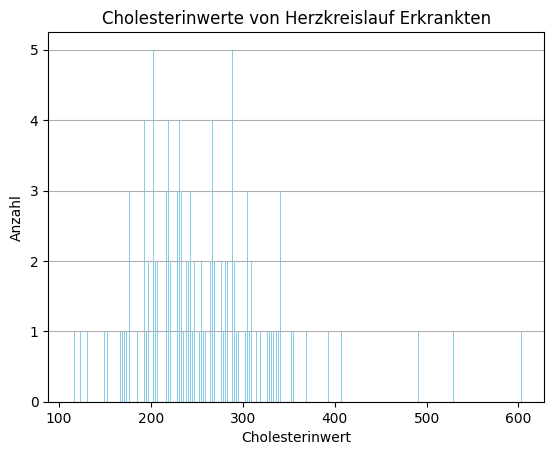

In [3]:
#Balkendiagramm zu bleibenden Beobachtungen erstellen
plt.bar(cholesterolCounts,cholesterol,color="skyblue")
plt.title("Cholesterinwerte von Herzkreislauf Erkrankten")
plt.xlabel("Cholesterinwert")
plt.ylabel("Anzahl")
plt.grid(axis="y")
plt.show()

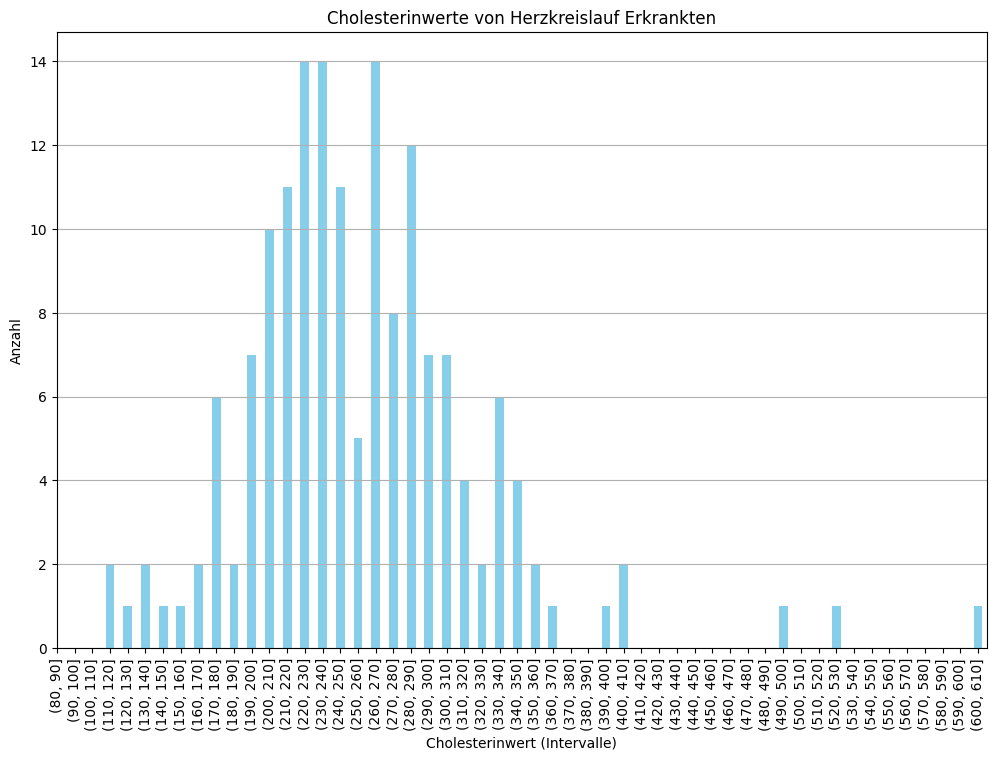

In [4]:
#Intervalle zur besseren Übersicht erstellen
bins = np.arange(0, cholesterolColumn.max() + 10, 10)
cholesterolIntervals = pd.cut(cholesterolColumn, bins=bins)
cholesterol = cholesterolIntervals.value_counts().sort_index()

#Balkendiagramm erstellen
plt.figure(figsize=(12, 8))
cholesterol.plot(kind="bar", color="skyblue")
plt.title("Cholesterinwerte von Herzkreislauf Erkrankten")
plt.xlabel("Cholesterinwert (Intervalle)")
plt.ylabel("Anzahl")
plt.grid(axis="y")
plt.xlim(8)
plt.show()

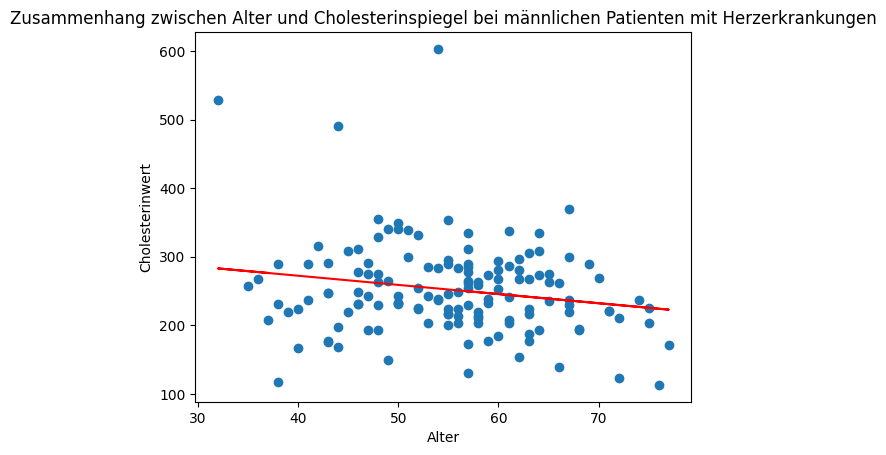

In [5]:
unhealthyData = unhealthyData[unhealthyData["Sex"] == "M"]

plt.title("Zusammenhang zwischen Alter und Cholesterinspiegel bei männlichen Patienten mit Herzerkrankungen")
plt.scatter(unhealthyData["Age"], unhealthyData["Cholesterol"])
m, b = np.polyfit(unhealthyData["Age"], unhealthyData["Cholesterol"], 1)
plt.plot(unhealthyData["Age"], m*unhealthyData["Age"] + b, color='red', label='Trendlinie')
plt.xlabel("Alter")
plt.ylabel("Cholesterinwert")
plt.show()

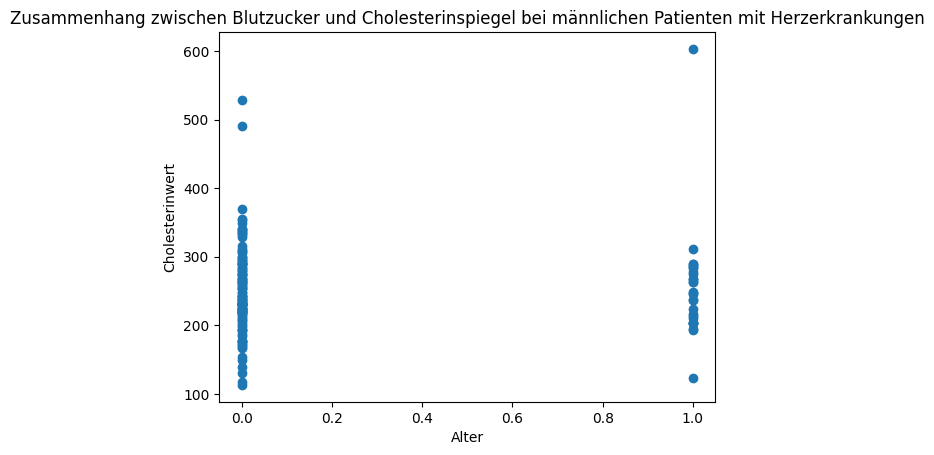

In [6]:
plt.title("Zusammenhang zwischen Blutzucker und Cholesterinspiegel bei männlichen Patienten mit Herzerkrankungen")
plt.scatter(unhealthyData["FastingBS"], unhealthyData["Cholesterol"])
plt.xlabel("Blutzucker>120")
plt.ylabel("Cholesterinwert")
plt.show()

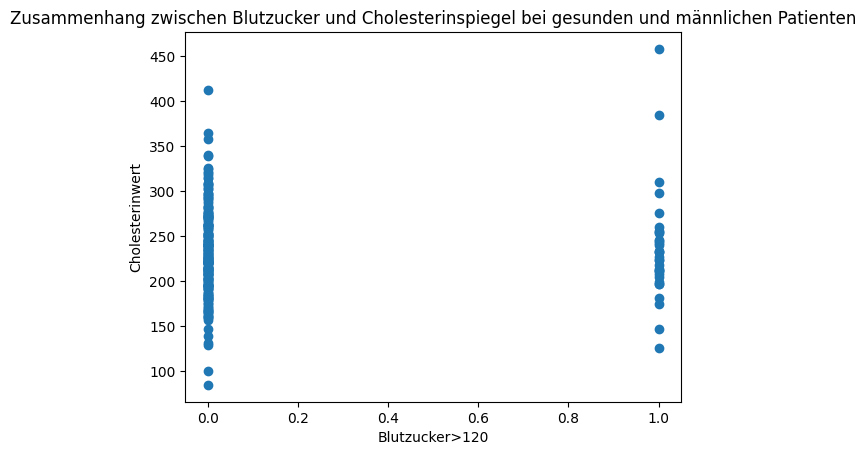

In [7]:
healthyData = heartData[(heartData["HeartDisease"] == 0) & (heartData["Cholesterol"]!=0) & (heartData["Sex"]!= "F")]

plt.title("Zusammenhang zwischen Blutzucker und Cholesterinspiegel bei gesunden und männlichen Patienten")
plt.scatter(healthyData["FastingBS"], healthyData["Cholesterol"])
plt.xlabel("Blutzucker>120")
plt.ylabel("Cholesterinwert")
plt.show()